# PROJETO 1 - Ciência dos Dados

Eng: 2A     / Nome: Gustavo Veiga Pierre

# Introdução:

##  IDH, CO2 e Veiculos

Foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
2. IDH dos paises
3. Carro, Caminhões e ônibus por 1000 pessoas

Nesses *dataframes*, as linhas representam os países, as colunas representam as variaveis escolhidas.

No projeto devemos escolher uma pergunta para responder, baseado nos dados coletados.
A pergunta escolhida foi:
        
   **É possivel ressaltar que o numero de veiculos é diretamente proporcional a emissão de CO2 em um pais. Podemos considerar tambem que os paises com maior desenvolvimento tendem a ter mais veiculos. Será que a industrialização de um pais e seu IDH estão ligados?**

Vamos nos restringir a analisar o ano de **2007**.

# Leitura dos arquivos:

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

co2 = pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
carros_caminhoes_onibus = pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')
HDI = pd.read_excel('hdi_human_development_index.xlsx')

# CO2

In [97]:
co2_2007 = co2.loc[:, ["geo", 2007]]

In [98]:
co2_2007.head()

,geo,2007
0,Afghanistan,0.0854
1,Albania,1.3000
2,Algeria,3.1900
3,Andorra,6.5200
4,Angola,1.2000


# IDH

In [99]:
IDH_2007 = HDI.loc[:, ["geo", 2007]]

In [100]:
IDH_2007.head()

,geo,2007
0,Afghanistan,0.433
1,Albania,0.713
2,Algeria,0.697
3,Andorra,NaN
4,Angola,0.468


# Veiculos por 1000 pessoas

In [101]:
carros_caminhoes_onibus_2007 = carros_caminhoes_onibus.loc[:, ["geo", 2007]]

In [102]:
carros_caminhoes_onibus_2007.head()

,geo,2007
0,Afghanistan,22.8
1,Albania,102.0
2,Algeria,NaN
3,Angola,39.6
4,Argentina,314.0


# Algumas alterações:

In [111]:
co2_2007.rename(columns={"geo":"Country"},inplace = True)
co2_idx = co2_2007.set_index('Country')
carros_caminhoes_onibus_2007.rename(columns={"geo":"Country"},inplace = True)
carros_caminhoes_onibus_idx = carros_caminhoes_onibus_2007.set_index('Country')
IDH_2007.rename(columns={"geo":"Country"},inplace = True)
IDH_idx = IDH_2007.set_index('Country')

co2_2007.rename(columns={'2007':"CO2 per capita"},inplace = True)
IDH_2007.rename(columns={'2007':"IDH"},inplace = True)
carros_caminhoes_onibus_2007.rename(columns={'2007':"Veiculos"},inplace = True)

In [112]:
co2_idx.head()

,CO2 per capita
Country,
Afghanistan,0.0854
Albania,1.3000
Algeria,3.1900
Andorra,6.5200
Angola,1.2000


In [113]:
carros_caminhoes_onibus_idx.head()

,Veiculos
Country,
Afghanistan,22.8
Albania,102.0
Algeria,NaN
Angola,39.6
Argentina,314.0


In [114]:
IDH_idx.head()

,IDH
Country,
Afghanistan,0.433
Albania,0.713
Algeria,0.697
Andorra,NaN
Angola,0.468


# Juntando as tabelas:

In [115]:
df = co2_idx.join(IDH_idx, how='inner',lsuffix='_2007', rsuffix='_2007')
df.head()

,CO2 per capita,IDH
Country,,
Afghanistan,0.0854,0.433
Albania,1.3000,0.713
Algeria,3.1900,0.697
Andorra,6.5200,NaN
Angola,1.2000,0.468


In [116]:
data = df.join(carros_caminhoes_onibus_idx, how="inner")
data.head()

,CO2 per capita,IDH,Veiculos
Country,,,
Afghanistan,0.0854,0.433,22.8
Albania,1.3000,0.713,102.0
Algeria,3.1900,0.697,NaN
Angola,1.2000,0.468,39.6
Argentina,4.3800,0.792,314.0


In [117]:
data.dropna()

,CO2 per capita,IDH,Veiculos
Country,,,
Afghanistan,0.0854,0.433,22.800
Albania,1.3000,0.713,102.000
Angola,1.2000,0.468,39.600
Argentina,4.3800,0.792,314.000
Armenia,1.7300,0.721,105.000
Australia,17.8000,0.921,653.000
Austria,8.3900,0.864,557.000
Bahamas,4.9400,0.791,81.700
Bahrain,25.9000,0.815,482.000


# Plotando gráficos:

Text(0.5,1,'IDH vs Co2 per capita')

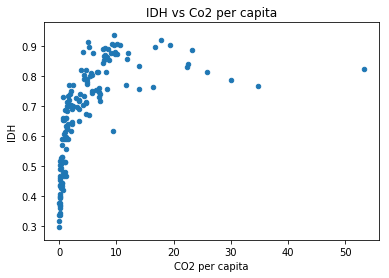

In [118]:
data.plot.scatter(x="CO2 per capita", y="IDH")
plt.title("IDH vs Co2 per capita")

In [119]:
data["log co2 per capita"] = np.log(data["CO2 per capita"])

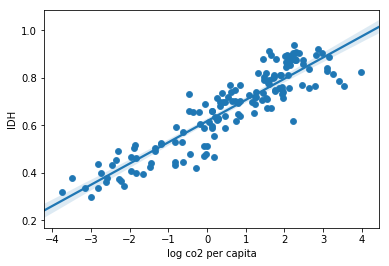

In [120]:
data.plot.scatter(x="log co2 per capita", y="IDH");
sns.regplot(data['log co2 per capita'], data['IDH']);

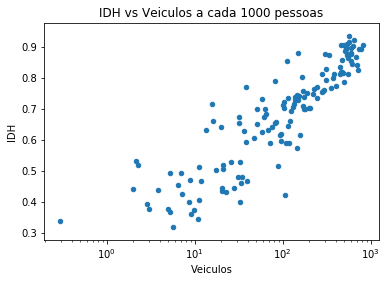

In [121]:
data.plot.scatter(x="Veiculos", y="IDH",logx=True);
plt.title("IDH vs Veiculos a cada 1000 pessoas");


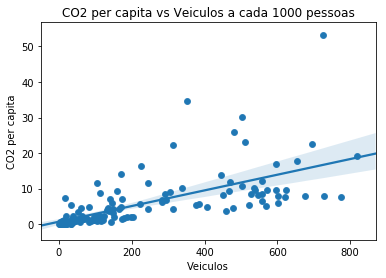

In [122]:
data.plot.scatter(x="Veiculos", y="CO2 per capita");
plt.title("CO2 per capita vs Veiculos a cada 1000 pessoas");
sns.regplot(data['Veiculos'], data['CO2 per capita']);

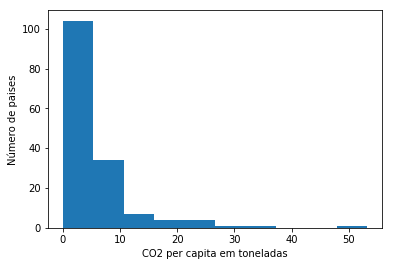

In [123]:
plt.hist(data['CO2 per capita']);
plt.xlabel("CO2 per capita em toneladas");
plt.ylabel("Número de paises");

Neste histograma podemos perceber facilmente a assimetria do mesmo. Fica claro a existência de outliers.

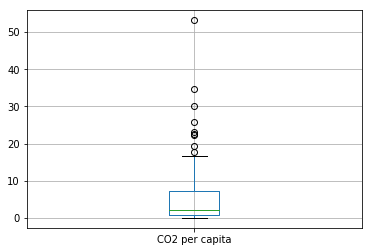

In [124]:
data.boxplot(column=['CO2 per capita']);

Nesse boxplot podemos perceber a quantidade de outliers que aumentam a média de CO2 emitido. O ponto mais ao alto é o Catar. Este pais tem essa alta emissão de CO2, pois é um pais petrolifero. Assim como Emirados Arabes e Kuwait que tambem são outliers, pois são paises petroliferos.

# Correlação

In [125]:
data.corr()

,CO2 per capita,IDH,Veiculos,log co2 per capita
CO2 per capita,1.000000,0.565357,0.662093,0.713259
IDH,0.565357,1.000000,0.806240,0.909409
Veiculos,0.662093,0.806240,1.000000,0.738348
log co2 per capita,0.713259,0.909409,0.738348,1.000000


# Conclusão

Eu acho que a questão de poluentes é muito abordada hoje em dia, pois todos tentamos ser mais sustentavéis para proteger nosso planeta. Portanto, resolvi investigar a relação do IDH com a emissão de CO2 e Veiculos por 1000 pessoas. Minha expectativa era que quanto maior o IDH mais veiculos e mais CO2 emitido. Segundo os dados levantados e os gráficos exibidos, podemos perceber uma grande correlação entre o Log do CO2 per capita e o IDH de um pais,pois o coeficiente de Pearson é alto e o gráfico de dispersão é coerente. Assim, podemos imaginar que quanto maior o IDH de um pais, mais ele é industrializado, logo ele emitirá mais CO2 per capita.Também é possivel notar a relação entre IDH e Veiculos por 1000 pessoas, onde paises com IDH maior e consequentemente uma qualidade de vida melhor, existem mais carros. Para concluir é possivel perceber que os dados estão relacionados, quanto mais um pais é desenvolvido, existem mais veiculos e assim ele é mais poluente, com a grande emissao de CO2. Para analises futuras podemos relacionar também o número de pessoas doentes por causa do reflexo da poluição do ar, e assim, estudarmos o efeito negativo que essa poluição causa na população.